# Toy model for wrinkles in $Gaia$+GALAH

### Contributors: Sven Buder, Melissa K. Ness, Kathryn V. Johnston

## Aim: 
Following up phase-space variations of *nr_stars* in a certain *potential* with certain perturbations

## Preamble

In [1]:
# Preamble 

# Compatibility with Python 3
from __future__ import (absolute_import, division, print_function)

try:
    %matplotlib inline
    %config InlineBackend.figure_format='retina'
except:
    pass

# Basics
import numpy as np
from astropy import units

# Matplotlib
import matplotlib
import matplotlib.pyplot as plt

# Galpy
import galpy
from galpy.orbit import Orbit
from galpy.potential import MWPotential2014

## Toy model and orbit integration

In [2]:
def toy_model(
    nr_stars  = 100,
    potential = MWPotential2014,
    snapshots = [0,1000],
    R_mean    =   8.,
    R_disp    =   0.001,
    vR_mean   =   0.,
    vR_disp   =   0.001,
    vT_mean   = 220.,
    vT_disp   =   0.001,
    z_mean    =  -0.1, 
    z_disp    =   0.04,
    vz_mean   =  -2.,
    vz_disp   =   1.,
    phi_mean  =   0.,
    phi_disp  =   0.001
    ):

    """
    A toy model to replicate the work by Antoja+2018 (arXiv:1804.10196)
    with a certain *nr_stars* 
    in a certain *potential* and integrated orbits 
    on a certain *timescale* for snapshots in [Myr]

    INPUT:
    nr_stars  : number of stars as part of this toy model
    potential : chosen potential from galpy.potential
    snapshots : np.array with times for which snapshots are generated in units of Myr
    R_mean    : Gaussian distribution mean in Galactocentric R [kpc]
    R_disp    : Gaussian distribution dispersion in Galactocentric R [kpc]
    vR_mean   : Gaussian distribution mean in Galactocentric V_R [km/s]
    vR_disp   : Gaussian distribution dispersion in Galactocentric V_R [km/s]
    vT_mean   : Gaussian distribution mean in Galactocentric V_phi [km/s]
    vT_disp   : Gaussian distribution dispersion in Galactocentric V_phi [km/s]
    z_mean    : Gaussian distribution mean in Galactocentric Z [kpc]
    z_disp    : Gaussian distribution dispersion in Galactocentric Z [kpc]
    vz_mean   : Gaussian distribution mean in Galactocentric V_Z [km/s]
    vz_disp   : Gaussian distribution dispersion in Galactocentric V_Z [km/s]
    phi_mean  : Gaussian distribution mean in Galactocentric Phi [deg]
    phi_disp  : Gaussian distribution dispersion in Galactocentric Phi [deg]

    OUTPUT:
    toy_model_orbits : dictionary

    """

    toy_model_orbits = {}
    for each_star in range(nr_stars):
        # o= Orbit(vxvv=[R,vR,vT,z,vz,phi])
        toy_model_orbits[each_star] = Orbit(vxvv=[
            np.random.normal(R_mean, R_disp)   *units.kpc, # R
            np.random.normal(vR_mean, vR_disp) *units.km/units.s, # vR
            np.random.normal(vT_mean, vT_disp) *units.km/units.s, # vT
            np.random.normal(z_mean, z_disp)   *units.kpc, # Z
            np.random.normal(vz_mean, vz_disp) *units.km/units.s, # vz
            np.random.normal(phi_mean, phi_disp)   *units.deg, # phi
            ],
            solarmotion='schoenrich'
            )

        toy_model_orbits[each_star].integrate(snapshots*units.Myr,potential)
    
    return toy_model_orbits

## Diagnostic subplot routines

In [3]:
def plot_z_vz(toy_model, snapshots = [0,1000], cmap='RdYlBu', ax='auto'):

    """
    simply plot the distribution of Z [kpc] vs. V_Z [km/s]
    for the given toy model for the given snapshots
    
    INPUT:
    toy_model
    snapshtos : array
    
    OUTPUT:
    fig : plot with scattered distribution of Z vs. V_Z for the given snapshots
    
    """

    if ax=='auto':
        ax=plt.gca()
    else:
        ax=ax
        
    kwargs_scatter = dict(s = 2)

    for each_star in range(nr_stars):
        for snapshot_nr, each_snapshot in enumerate(snapshots):
            s1 = ax.scatter(
                toy_model[each_star].z(each_snapshot*units.Myr),
                toy_model[each_star].vz(each_snapshot*units.Myr),
                c = each_snapshot, 
                cmap=cmap, vmin=snapshots[0], vmax=snapshots[-1], #norm=matplotlib.colors.LogNorm(),
                **kwargs_scatter
            )
    #ax.set_xlim(-1, 1);
    #ax.set_ylim(-60, 60);
    ax.set_xlabel(r'$Z\,\mathrm{[kpc]}$')
    ax.set_ylabel(r'$V_Z\,\mathrm{[km\,s^{-1}]}$')
    #plt.legend(loc=[0.5,1.1]);
    plt.tight_layout()
    c1 = plt.colorbar(s1, ax=ax)
    c1.set_label(r'$\tau\,\mathrm{[Myr]}$')
    
    return fig;
def plot_z_vR(toy_model, snapshots = [0,1000], cmap='RdYlBu', ax='auto'):

    """
    simply plot the distribution of Z [kpc] vs. V_Z [km/s]
    for the given toy model for the given snapshots
    
    INPUT:
    toy_model
    snapshtos : array
    
    OUTPUT:
    fig : plot with scattered distribution of Z vs. V_Z for the given snapshots
    
    """
    
    if ax=='auto':
        ax=plt.gca()
    else:
        ax=ax

    kwargs_scatter = dict(s = 2)

    for each_star in range(nr_stars):
        for snapshot_nr, each_snapshot in enumerate(snapshots):
            s1 = ax.scatter(
                toy_model[each_star].z(each_snapshot*units.Myr),
                toy_model[each_star].vR(each_snapshot*units.Myr),
                c = each_snapshot, 
                cmap=cmap, vmin=snapshots[0], vmax=snapshots[-1], #norm=matplotlib.colors.LogNorm(),
                **kwargs_scatter
            )
    #ax.set_xlim(-1, 1);
    #ax.set_ylim(-5,5);
    ax.set_xlabel(r'$Z\,\mathrm{[kpc]}$')
    ax.set_ylabel(r'$V_R\,\mathrm{[km\,s^{-1}]}$')
    plt.tight_layout()
    c1 = plt.colorbar(s1, ax=ax)
    c1.set_label(r'$\tau\,\mathrm{[Myr]}$')
    
    return fig;
def plot_R_vphi(toy_model, snapshots = [0,1000], cmap='RdYlBu', ax='auto'):

    """
    simply plot the distribution of Z [kpc] vs. V_Z [km/s]
    for the given toy model for the given snapshots
    
    INPUT:
    toy_model
    snapshtos : array
    
    OUTPUT:
    fig : plot with scattered distribution of Z vs. V_Z for the given snapshots
    
    """
    
    if ax=='auto':
        ax=plt.gca()
    else:
        ax=ax

    kwargs_scatter = dict(s = 2)

    for each_star in range(nr_stars):
        for snapshot_nr, each_snapshot in enumerate(snapshots):
            s1 = ax.scatter(
                toy_model[each_star].R(each_snapshot*units.Myr),
                toy_model[each_star].vphi(each_snapshot*units.Myr),
                c = each_snapshot, 
                cmap=cmap, vmin=snapshots[0], vmax=snapshots[-1], #norm=matplotlib.colors.LogNorm(),
                **kwargs_scatter
            )
    #ax.set_xlim(4, 13);
    #ax.set_ylim(50, 350);
    ax.set_xlabel(r'$R\,\mathrm{[kpc]}$')
    ax.set_ylabel(r'$V_\phi\,\mathrm{[km\,s^{-1}]}$')
    plt.tight_layout()
    c1 = plt.colorbar(s1, ax=ax)
    c1.set_label(r'$\tau\,\mathrm{[Myr]}$')
    
    return fig;
def plot_vR_vphi(toy_model, snapshots = [0,1000], cmap='RdYlBu', ax='auto'):

    """
    simply plot the distribution of V_R [km/s] vs. V_Z [km/s]
    for the given toy model for the given snapshots
    
    INPUT:
    toy_model
    snapshtos : array
    
    OUTPUT:
    fig : plot with scattered distribution of Z vs. V_Z for the given snapshots
    
    """
    
    if ax=='auto':
        ax=plt.gca()
    else:
        ax=ax

    kwargs_scatter = dict(s = 2)

    for each_star in range(nr_stars):
        for snapshot_nr, each_snapshot in enumerate(snapshots):
            s1 = ax.scatter(
                toy_model[each_star].vR(each_snapshot*units.Myr),
                toy_model[each_star].vphi(each_snapshot*units.Myr),
                c = each_snapshot, 
                cmap=cmap, vmin=snapshots[0], vmax=snapshots[-1], #norm=matplotlib.colors.LogNorm(),
                **kwargs_scatter
            )
    ax.set_xlabel(r'$V_R\,\mathrm{[km\,s^{-1}]}$')
    ax.set_ylabel(r'$V_\phi\,\mathrm{[km\,s^{-1}]}$')
    plt.tight_layout()
    c1 = plt.colorbar(s1, ax=ax)
    c1.set_label(r'$\tau\,\mathrm{[Myr]}$')
    
    return fig;
def plot_z_vz_color(toy_model, snapshots = [0,1000], cmap='RdYlBu', ax='auto'):

    """
    simply plot the distribution of Z [kpc] vs. V_Z [km/s] colored by V_phi [km/s]
    for the given toy model for the given snapshots
    
    INPUT:
    toy_model
    snapshtos : array
    
    OUTPUT:
    fig : plot with scattered distribution of Z vs. V_Z for the given snapshots
    
    """
    
    if ax=='auto':
        ax=plt.gca()
    else:
        ax=ax

    kwargs_scatter = dict(s = 2)

    s1 = ax.scatter(
        [new_toy_model[each_star].z(snapshots[-1]*units.Myr) for each_star in range(nr_stars)],
        [new_toy_model[each_star].vz(snapshots[-1]*units.Myr) for each_star in range(nr_stars)],
        c = [new_toy_model[each_star].vphi(snapshots[-1]*units.Myr)[0] for each_star in range(nr_stars)], 
        cmap=cmap,
        **kwargs_scatter
    )
    #ax.set_xlim(-1, 1);
    #ax.set_ylim(-60, 60);
    ax.set_xlabel(r'$z\,\mathrm{[kpc]}$')
    ax.set_ylabel(r'$V_z\,\mathrm{[km\,s^{-1}]}$')
    plt.tight_layout()
    c1 = plt.colorbar(s1, ax=ax)
    c1.set_label(r'$V_\phi\,\mathrm{[km\,s^{-1}]}$')
    
    ax.text(0.5,0.9,r'Snapshot at $\tau='+str(snapshots[-1])+'\,\mathrm{Myr}$', transform=ax.transAxes, ha='center', fontsize=15)
    
    return fig;
def plot_R_z(toy_model, snapshots = [0,1000], cmap='RdYlBu', ax='auto'):

    """
    simply plot the distribution of Z [kpc] vs. V_Z [km/s]
    for the given toy model for the given snapshots
    
    INPUT:
    toy_model
    snapshtos : array
    
    OUTPUT:
    fig : plot with scattered distribution of Z vs. V_Z for the given snapshots
    
    """
    
    if ax=='auto':
        ax=plt.gca()
    else:
        ax=ax

    kwargs_scatter = dict(s = 2)

    for each_star in range(nr_stars):
        for snapshot_nr, each_snapshot in enumerate(snapshots):
            s1 = ax.scatter(
                toy_model[each_star].R(each_snapshot*units.Myr),
                toy_model[each_star].z(each_snapshot*units.Myr),
                c = each_snapshot, 
                cmap=cmap, vmin=snapshots[0], vmax=snapshots[-1], #norm=matplotlib.colors.LogNorm(),
                **kwargs_scatter
            )
    #ax.set_xlim(4, 13);
    #ax.set_ylim(-1, 1);
    ax.set_xlabel(r'$R\,\mathrm{[kpc]}$')
    ax.set_ylabel(r'$z\,\mathrm{[kpc]}$')
    plt.tight_layout()
    c1 = plt.colorbar(s1, ax=ax)
    c1.set_label(r'$\tau\,\mathrm{[Myr]}$')
    
    return fig;
def plot_X_Y(toy_model, snapshots = [0,1000], cmap='RdYlBu', ax='auto'):

    """
    simply plot the distribution of Z [kpc] vs. V_Z [km/s]
    for the given toy model for the given snapshots
    
    INPUT:
    toy_model
    snapshtos : array
    
    OUTPUT:
    fig : plot with scattered distribution of Z vs. V_Z for the given snapshots
    
    """
    
    if ax=='auto':
        ax=plt.gca()
    else:
        ax=ax

    kwargs_scatter = dict(s = 2)

    for each_star in range(nr_stars):
        for snapshot_nr, each_snapshot in enumerate(snapshots):
            s1 = ax.scatter(
                np.cos(toy_model[each_star].phi(each_snapshot*units.Myr)) * toy_model[each_star].R(each_snapshot*units.Myr),
                np.sin(toy_model[each_star].phi(each_snapshot*units.Myr)) * toy_model[each_star].R(each_snapshot*units.Myr),
                c = each_snapshot, 
                cmap=cmap, vmin=snapshots[0], vmax=snapshots[-1], #norm=matplotlib.colors.LogNorm(),
                **kwargs_scatter
            )
    ax.set_xlabel(r'$X\,\mathrm{[kpc]}$')
    ax.set_ylabel(r'$Y\,\mathrm{[kpc]}$')
    plt.tight_layout()
    c1 = plt.colorbar(s1, ax=ax)
    c1.set_label(r'$\tau\,\mathrm{[Myr]}$')
    
    return fig;

## Execution of orbit integration and plotting

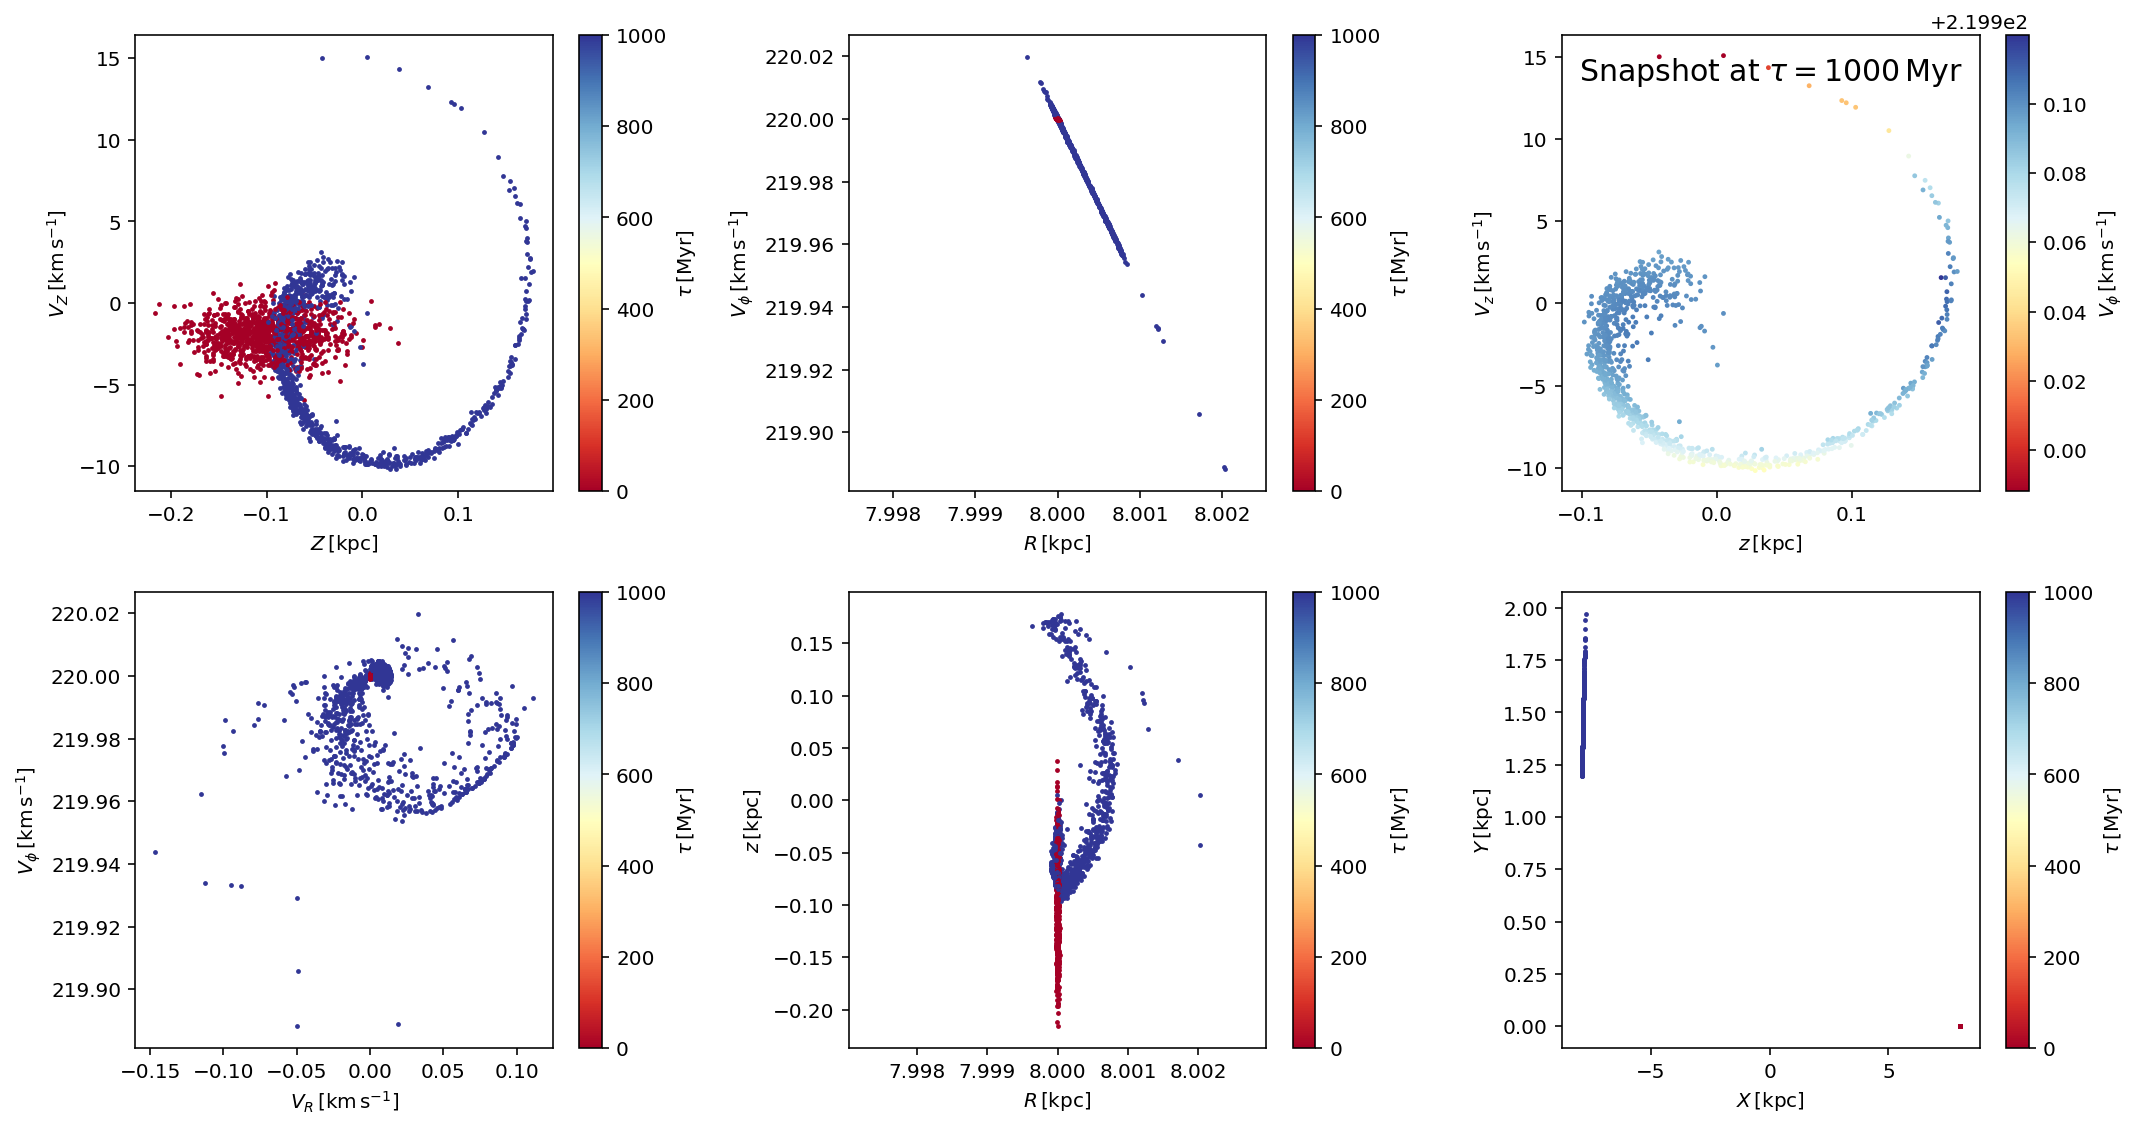

In [4]:
nr_stars = 1000
snapshots = np.linspace(0,1000,10) # in units of Myr

new_toy_model = toy_model(
    nr_stars=nr_stars, 
    potential=MWPotential2014,
    snapshots=snapshots,
    R_mean    =   8.,      R_disp    =   0.00001, # allowing to also perturb R
    vR_mean   =   0.,      vR_disp   =   0.00001, # allowing to also perturb vR
    vT_mean   = 220.,      vT_disp   =   0.00001, # allowing to also perturb vT
    z_mean    =  -0.1,      z_disp   =   0.04,    # Antoja+ -0.1, 0.04
    vz_mean   =  -2.,      vz_disp   =   1.,      # Antoja+ -2.0, 1.00
    phi_mean  =   0.,      phi_disp  =   0.00001  # allowing to also perturb phi
    )

fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(15,8))
fig_1 = plot_z_vz(new_toy_model, snapshots = [0,1000], cmap = 'RdYlBu', ax=ax1)
fig_2 = plot_R_vphi(new_toy_model, snapshots = [0,1000], cmap = 'RdYlBu', ax=ax2)
fig_3 = plot_z_vz_color(new_toy_model, snapshots = [0,1000], cmap = 'RdYlBu', ax=ax3)
fig_4 = plot_vR_vphi(new_toy_model, snapshots = [0,1000], cmap = 'RdYlBu', ax=ax4)
fig_5 = plot_R_z(new_toy_model, snapshots = [0,1000], cmap = 'RdYlBu', ax=ax5)
fig_6 = plot_X_Y(new_toy_model, snapshots = [0,1000], cmap = 'RdYlBu', ax=ax6)
try:
    plt.savefig('toy_model_1.png', dpi=200)
except:
    pass